#### **Importing Libraries and Cleaning Data**

In [ ]:
# Importing libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading data 
df = pd.read_csv(r"...\data_jobs.csv")

df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [ ]:
# Checking data types
df.dtypes

job_title_short           object
job_title                 object
job_location              object
job_via                   object
job_schedule_type         object
job_work_from_home          bool
search_location           object
job_posted_date           object
job_no_degree_mention       bool
job_health_insurance        bool
job_country               object
salary_rate               object
salary_year_avg          float64
salary_hour_avg          float64
company_name              object
job_skills                object
job_type_skills           object
dtype: object

In [ ]:
# Correcting data types
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [61]:
# Calculate percentage of null values in each column
null_count = df.isnull().sum()
null_percentage = df.isnull().sum() / len(df) * 100

# Combine into a DataFrame
null_df = pd.DataFrame({'Total Null Values': null_count, 'Percentage (%)': null_percentage})

null_df

,Total Null Values,Percentage (%)
job_title_short,0,0.000000
job_title,1,0.000127
job_location,1045,0.132995
job_via,8,0.001018
job_schedule_type,12667,1.612109
job_work_from_home,0,0.000000
search_location,0,0.000000
job_posted_date,0,0.000000
job_no_degree_mention,0,0.000000
job_health_insurance,0,0.000000


In [62]:
# dropping columns with more than 60% null values
df = df.drop(columns=['salary_rate', 'salary_year_avg', 'salary_hour_avg'])

In [63]:
# dropping rows will null values
df = df.dropna()

In [64]:
# dropping duplicate rows
df = df.drop_duplicates()

In [65]:
# Remove 'via' from the values in 'job_via' column
df['job_via'] = df['job_via'].str.replace(r'\s*via\s*', '', regex=True)

In [66]:
# Convert string representations of list into actual Python list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x))

In [67]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
5,Data Engineer,GCP Data Engineer,Anywhere,ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."


#### **Questions to Answer**

1. Which job role had the highest percentage of job postings?
2. Which country recorded the highest number of job openings?
3. Which companies were the top recruiters based on job postings?
4. Which job posting platform is used the most by employers??
5. What percentage of job postings offer work-from-home options, require a degree, or provide health insurance?
6. What are the key trends and patterns in job postings for Data Analyst, Data Engineer, and Data Scientist roles over time?
7. What are the most in-demand skills for the top three most popular data roles in the US?

#### **1. Which job role had the highest percentage of job postings?**

In [ ]:
# Calculate the percentage distribution of job titles in the dataset
df_job_titles = df['job_title_short'].value_counts(normalize=True).mul(100).to_frame().head(10)
df_job_titles

,proportion
job_title_short,
Data Engineer,25.381720
Data Analyst,23.638126
Data Scientist,21.886923
Senior Data Engineer,6.257276
Software Engineer,5.666186
Business Analyst,5.445973
Senior Data Scientist,4.838904
Senior Data Analyst,3.710749
Machine Learning Engineer,1.827296


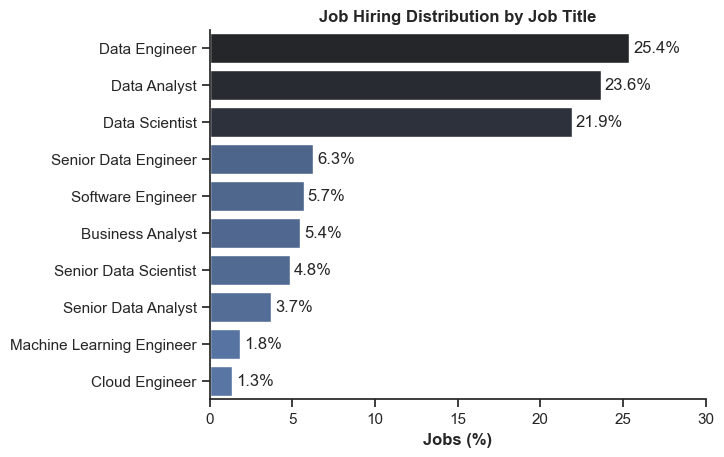

In [ ]:
# Plot
sns.set_theme(style='ticks')
ax = sns.barplot(data=df_job_titles, x='proportion', y='job_title_short', hue='proportion', palette='dark:b_r', legend=False)
sns.despine()

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

# Set x-axis limit to 30%
plt.xlim(0, 30)

plt.title('Job Hiring Distribution by Job Title', weight='bold')
plt.xlabel('Jobs (%)', weight='bold')
plt.ylabel('')
plt.show()

#### **2. Which country recorded the highest number of job openings?**

In [ ]:
# Calculate the percentage distribution of job postings by country
df_job_country = df['job_country'].value_counts(normalize=True).mul(100).to_frame().head(10)
df_job_country

,proportion
job_country,
United States,27.455710
India,6.956419
United Kingdom,5.154689
France,5.047855
Germany,3.344742
Spain,3.338655
Singapore,3.142944
Sudan,2.947689
Netherlands,2.612424


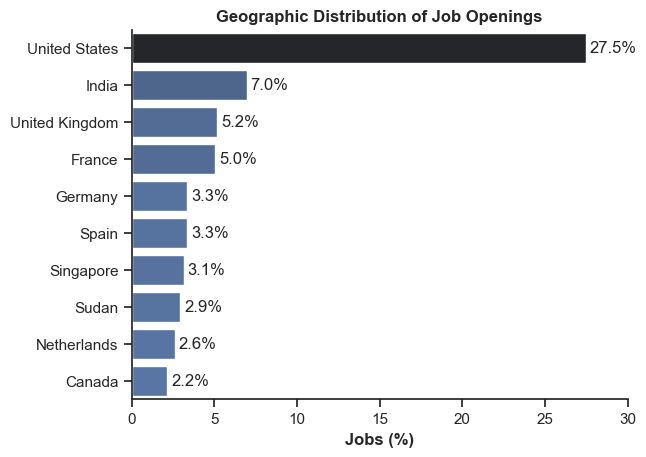

In [ ]:
# Plot
sns.set_theme(style='ticks')
ax = sns.barplot(data=df_job_country, x='proportion', y='job_country', hue='proportion', palette='dark:b_r', legend=False)
sns.despine()

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

# Set x-axis limit to 30%
plt.xlim(0, 30)

plt.title('Geographic Distribution of Job Openings', weight='bold')
plt.xlabel('Jobs (%)', weight='bold')
plt.ylabel('')
plt.show()

#### **3. Which companies were the top recruiters based on job postings?**

In [ ]:
# Calculate the percentage distribution of job postings by company
df_job_company = df['company_name'].value_counts(normalize=True).mul(100).to_frame().head(10)
df_job_company

,proportion
company_name,
Emprego,0.821043
Booz Allen Hamilton,0.401314
Dice,0.394618
Harnham,0.364181
Insight Global,0.319134
Listopro,0.298589
Capital One,0.291893
UnitedHealth Group,0.264956
Walmart,0.261455


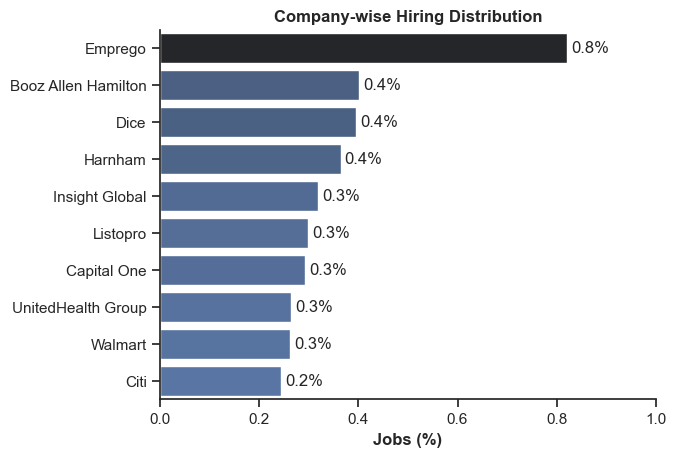

In [ ]:
# Plot
sns.set_theme(style='ticks')
ax = sns.barplot(data=df_job_company, x='proportion', y='company_name', hue='proportion', palette='dark:b_r', legend=False)
sns.despine()

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

# Set x-axis limit to 1%
plt.xlim(0, 1)

plt.title('Company-wise Hiring Distribution', weight='bold')
plt.xlabel('Jobs (%)', weight='bold')
plt.ylabel('')
plt.show()

#### **4. Which job posting platform is used the most by employers?**

In [ ]:
# Calculate the percentage distribution of job postings by platform
df_job_platform = df['job_via'].value_counts(normalize=True).mul(100).to_frame().head(5)
df_job_platform

,proportion
job_via,
LinkedIn,25.039911
BeBee,12.555186
Trabajo.org,7.467611
Indeed,5.744105
Recruit.net,2.982540


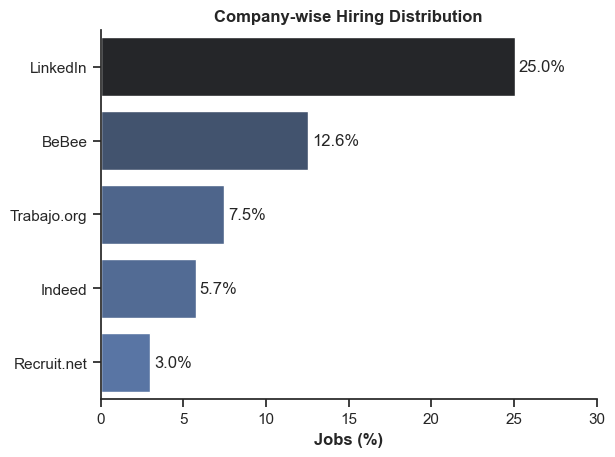

In [ ]:
# Plot
sns.set_theme(style='ticks')
ax = sns.barplot(data=df_job_platform, x='proportion', y='job_via', hue='proportion', palette='dark:b_r', legend=False)
sns.despine()

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

# Set x-axis limit to 30%
plt.xlim(0, 30)

plt.title('Company-wise Hiring Distribution', weight='bold')
plt.xlabel('Jobs (%)', weight='bold')
plt.ylabel('')
plt.show()

#### **5. What percentage of job postings offer work-from-home options, require a degree, or provide health insurance?**

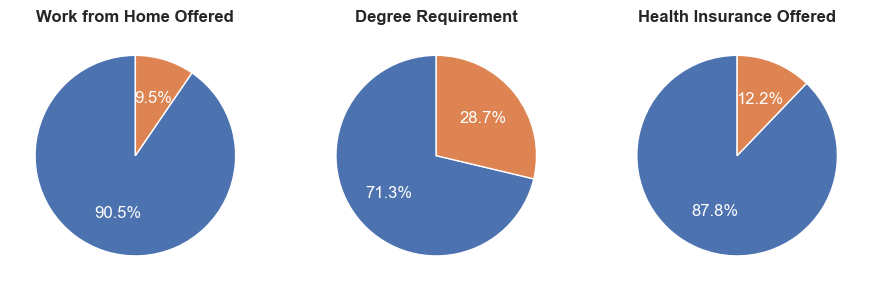

In [ ]:
# Dictionary mapping dataset column names to more readable chart titles
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

# Create a figure with 1 row and 3 columns of subplots, set figure size
fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

# Loop through each column-title pair in the dictionary
# Create multiple pie charts—one for each column in the dataset
for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(
        df[column].value_counts(), 
        labels=['False', 'True'], 
        autopct='%1.1f%%', 
        startangle=90, 
        textprops={'color': 'white'}
    )
    ax[i].set_title(title, weight='bold')

plt.show()


#### **6. What are the key trends and patterns in job postings for Data Analyst, Data Engineer, and Data Scientist roles over time?**

In [161]:
# Extract Year-Month
df['year_month'] = df['job_posted_date'].dt.to_period('M')
df['year_month'].to_frame()

,year_month
1,2023-01
2,2023-10
3,2023-07
4,2023-08
5,2023-11
...,...
785736,2023-03
785737,2023-03
785738,2023-03
785739,2023-03


In [162]:
# Filter for the relevant job titles in the US
job_roles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_filtered = df[(df['job_title'].isin(job_roles)) & (df['job_country'] == 'United States')]
df_filtered.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,company_name,job_skills,job_type_skills,job_posting_month,year_month,year_week,week_number
11,Data Engineer,Data Engineer,"Colorado Springs, CO (+3 others)",The Muse,Full-time,False,"Texas, United States",2023-11-03 13:06:51,False,True,United States,Philips,"[python, qlik]","{'analyst_tools': ['qlik'], 'programming': ['p...",2023-11,2023-11,2023-W44,Week 44
39,Data Engineer,Data Engineer,"Fort Worth, TX",LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,Programmers.io,"[sql, python]","{'programming': ['sql', 'python']}",2023-01,2023-01,2023-W04,Week 04
53,Data Engineer,Data Engineer,"San Mateo, CA",LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,Verkada,"[sql, python, aws, looker]","{'analyst_tools': ['looker'], 'cloud': ['aws']...",2023-01,2023-01,2023-W04,Week 04
61,Data Engineer,Data Engineer,"Cincinnati, OH",SimplyHired,Full-time,False,"Texas, United States",2023-01-22 13:08:53,False,False,United States,Divisions Maintenance Group,"[sql, nosql, python, java, c++, scala, cassand...","{'databases': ['cassandra'], 'libraries': ['ha...",2023-01,2023-01,2023-W04,Week 04
110,Data Engineer,Data Engineer,"NAVAL SEA SYS, DC",WANE Jobs,Full-time,False,"California, United States",2023-05-01 13:08:34,False,True,United States,LEIDOS,"[sql, nosql, mongodb, mongodb, python, java, m...","{'analyst_tools': ['tableau'], 'cloud': ['aws'...",2023-05,2023-05,2023-W18,Week 18


In [163]:
# Count jobs per role per month
job_counts = df_filtered.groupby(['year_month', 'job_title']).size().unstack().fillna(0)

# Convert to percentage per month
job_percentages = job_counts.div(job_counts.sum(axis=1), axis=0) * 100

# Convert year_month to string with month name (e.g., 'Jan 2024')
job_percentages.index = job_percentages.index.to_timestamp().strftime('%b')
job_percentages

job_title,Data Analyst,Data Engineer,Data Scientist
year_month,,,
Jan,42.572178,17.664042,39.763780
Feb,36.609177,26.749105,36.641718
Mar,38.156591,26.990420,34.852990
Apr,38.614832,22.868344,38.516825
May,34.863350,26.559215,38.577435
Jun,36.492563,27.153234,36.354203
Jul,33.073131,25.677896,41.248973
Aug,35.562219,23.598201,40.839580
Sep,29.342051,32.979158,37.678790


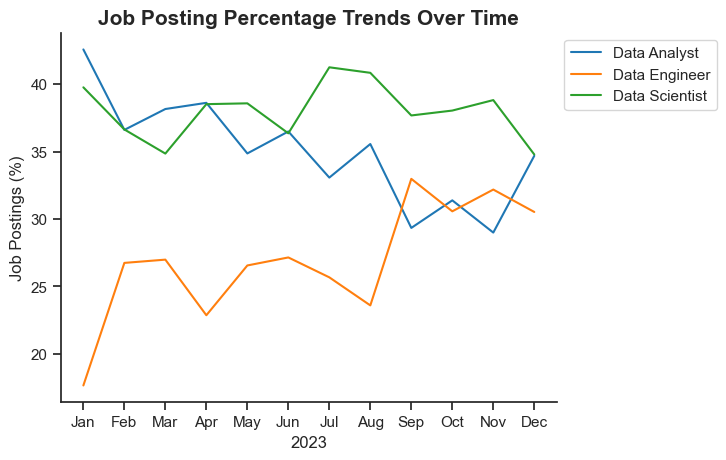

In [164]:
# Set theme
sns.set_theme(style='ticks')

# Create the line plot
ax = sns.lineplot(data=job_percentages.iloc[:, :5], dashes=False, palette='tab10')

# Formatting
plt.xlabel('2023')
plt.ylabel('Job Postings (%)')
plt.title('Job Posting Percentage Trends Over Time', fontsize=15, weight='bold')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
sns.despine()
plt.show()

#### **7. What are the most in-demand skills for the top three most popular data roles in the US?**

In [105]:
# Filter the data for the market of the United States.
df_US = df[df['job_country'] == 'United States']

In [106]:
# Exploding the 'job_skills' column to have one skill per row
df_skills = df_US.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,aws
...,...,...
785692,Data Scientist- Hybrid Work Location,matlab
785692,Data Scientist- Hybrid Work Location,r
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


In [107]:
# Group by job_skills and job_title_short and count the number of occurrences
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

# Name the count column as count
df_skills_count = df_skills_count.reset_index(name='skill_count')

# Sort the values by skill_count in descending order
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42062
1521,sql,Data Analyst,33969
1523,sql,Data Scientist,29797
455,excel,Data Analyst,27117
1243,r,Data Scientist,25842
...,...,...,...
984,node.js,Cloud Engineer,1
959,nltk,Senior Data Analyst,1
960,nltk,Senior Data Engineer,1
964,no-sql,Cloud Engineer,1


In [ ]:
# Filter the job titles based on the most popular.
job_titles = df_skills_count['job_title_short'].unique().tolist()

# Sort the selected job titles in ascending order (alphabetical or numerical)
job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

In [110]:
# Use original df to get the count of job titles
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,56584
1,Data Scientist,51238
2,Data Engineer,33023
3,Senior Data Scientist,11557
4,Senior Data Analyst,10355
5,Senior Data Engineer,8880
6,Business Analyst,6118
7,Software Engineer,1514
8,Machine Learning Engineer,817
9,Cloud Engineer,323


In [ ]:
# Merge the skills count DataFrame with the job title count DataFrame
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, on='job_title_short', how='left')

# Calculate the percentage of job postings that mention each skill
df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42062,51238,82.091417
1,sql,Data Analyst,33969,56584,60.032871
2,sql,Data Scientist,29797,51238,58.154104
3,excel,Data Analyst,27117,56584,47.923441
4,r,Data Scientist,25842,51238,50.435224
...,...,...,...,...,...
1865,node.js,Cloud Engineer,1,323,0.309598
1866,nltk,Senior Data Analyst,1,10355,0.009657
1867,nltk,Senior Data Engineer,1,8880,0.011261
1868,no-sql,Cloud Engineer,1,323,0.309598


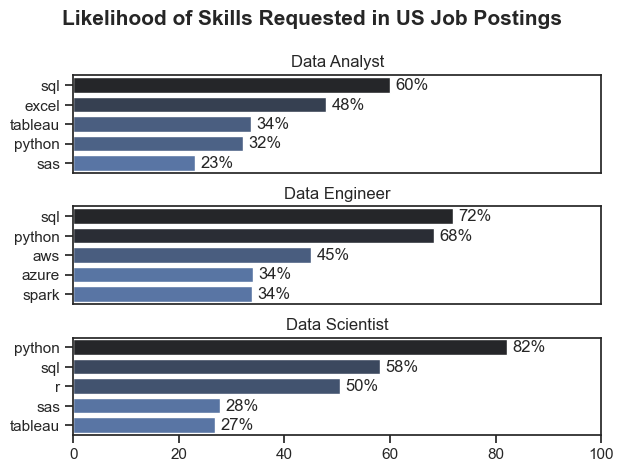

In [ ]:
# Create subplots with the number of rows equal to the number of job titles
fig, ax = plt.subplots(len(job_titles), 1)  

# Loop through each job title to generate a bar plot
for i, job_title in enumerate(job_titles):
    # Filter the top 5 most requested skills for the current job title
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)

    # Create a horizontal bar plot of skill percentages
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills',  ax=ax[i],hue='skill_count', palette='dark:b_r'  )

    # Apply common formatting to all subplots
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 100)

    # Remove x-axis tick labels for all subplots except the last one
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    # Add percentage labels to the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15, weight='bold')
fig.tight_layout(h_pad=.8)

plt.show()